In [18]:
import sys
sys.path.append(sys.path[0] + '/../cpp/bin')

import PyMorpionSolitaire

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from random import randrange
from tqdm import tqdm

In [62]:
N = 9

In [63]:
seed_game = PyMorpionSolitaire.Game5T('c')

In [64]:
def one_game(game):
    game.restart()
    game.playAtRandom()
    revert_number = randrange(N + 1)
    if revert_number > 0:
        game.undo(revert_number)
    depth = game.exploreDepth(N + 1)
    if depth > N:
        return one_game(game)
    grid = game.image()[48:144, 48:144]
    score = game.getScore()
    number_of_moves = game.getNumberOfMoves()
    return grid, score, number_of_moves, depth

In [65]:
def one_batch(game, batch_size = 200):
    grids, scores, moves, depths = list(zip(*[one_game(game) for _ in range(batch_size)]))
    return np.array(grids), np.array(scores), np.array(moves), np.array(depths)

# Analyze one big batch

In [66]:
grids, scores, moves, depths = one_batch(seed_game, 10000)

In [67]:
def plot_histogram(data, xlabel = "", ylabel = "Count", **kwargs):
    bins = [n - 0.5 for n in range(max(data) + 2)]
    count, bins = np.histogram(data, bins=bins)
    plt.step(bins, np.insert(count, 0, 0),  **kwargs)
    plt.xlim((-0.5, max(data) + 0.5))
    plt.ylim(0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

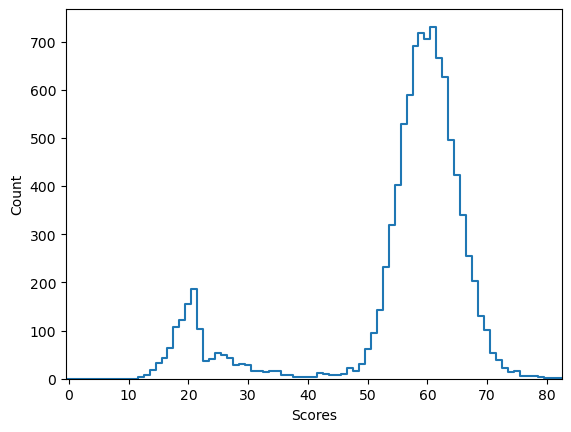

In [68]:
plot_histogram(scores, "Scores")

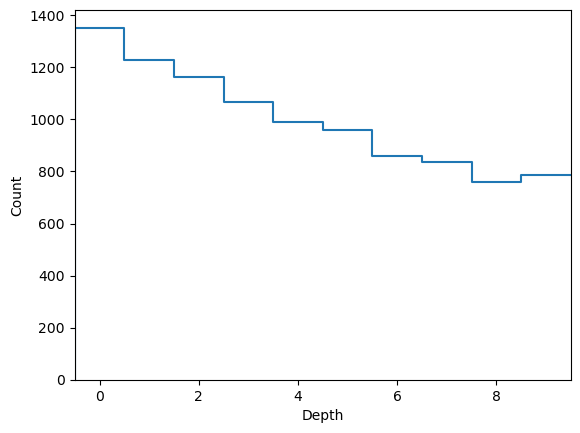

In [70]:
plot_histogram(depths, "Depth")

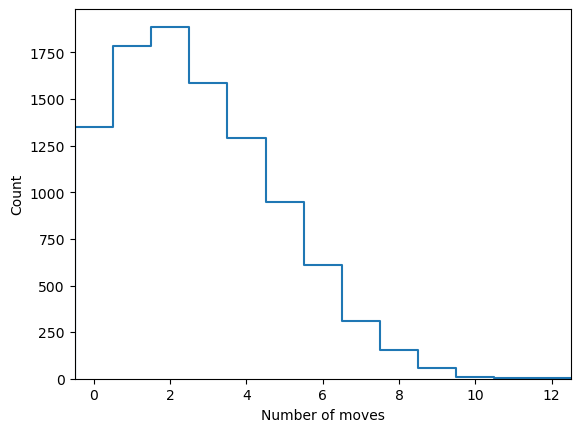

In [71]:
plot_histogram(moves, "Number of moves")

In [72]:
depth_and_move = np.array([depths, moves]).transpose()

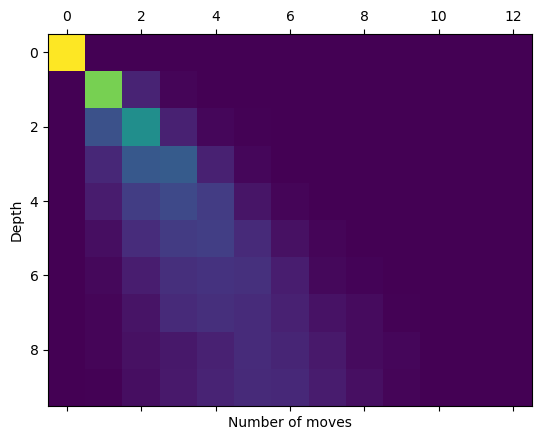

In [73]:
count = np.zeros((N + 1, moves.max() + 1))

for (depth, move) in depth_and_move:
    count[depth, move] += 1

plt.matshow(count)
plt.xlabel('Number of moves')
plt.ylabel('Depth')
plt.show()

In [74]:
depth_value, depth_count = np.unique(depths, return_counts=True)
depth_value, depth_count

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1352, 1228, 1161, 1066,  991,  958,  859,  838,  761,  786]))

In [75]:
depth_and_move_value, depth_and_move_count = np.unique(depth_and_move, axis=0, return_counts=True)
depth_and_move_value, depth_and_move_count

(array([[ 0,  0],
        [ 1,  1],
        [ 1,  2],
        [ 1,  3],
        [ 1,  4],
        [ 2,  1],
        [ 2,  2],
        [ 2,  3],
        [ 2,  4],
        [ 2,  5],
        [ 3,  1],
        [ 3,  2],
        [ 3,  3],
        [ 3,  4],
        [ 3,  5],
        [ 3,  6],
        [ 4,  1],
        [ 4,  2],
        [ 4,  3],
        [ 4,  4],
        [ 4,  5],
        [ 4,  6],
        [ 4,  7],
        [ 4,  8],
        [ 5,  1],
        [ 5,  2],
        [ 5,  3],
        [ 5,  4],
        [ 5,  5],
        [ 5,  6],
        [ 5,  7],
        [ 5,  8],
        [ 6,  1],
        [ 6,  2],
        [ 6,  3],
        [ 6,  4],
        [ 6,  5],
        [ 6,  6],
        [ 6,  7],
        [ 6,  8],
        [ 6,  9],
        [ 7,  1],
        [ 7,  2],
        [ 7,  3],
        [ 7,  4],
        [ 7,  5],
        [ 7,  6],
        [ 7,  7],
        [ 7,  8],
        [ 7,  9],
        [ 7, 12],
        [ 8,  1],
        [ 8,  2],
        [ 8,  3],
        [ 8,  4],
        [ 

# Store data

In [61]:
for i in tqdm(range(0,10000)):
    grids, scores, moves, depths = one_batch(seed_game)
    np.save("data_max_%d/grids_%05d.npy" % (N, i), grids)
    np.save("data_max_%d/scores_%05d.npy" % (N, i), scores)
    np.save("data_max_%d/depths_%05d.npy" % (N, i), depths)

100%|█████████████████████████████████████| 10000/10000 [15:16<00:00, 10.91it/s]


Compress the data using the following commands in a terminal:

`cd <repo>/deeplearning`

`tar -czf data_max_N.tar.gz data_max_N`